In [2]:
#Task 1
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Task 1: Analyzing the Dataset

# Step 1: Data Retrieval
data = pd.read_csv("C:\\Users\\Tejas\\Forbes.csv")

In [4]:
data

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [5]:
# Step 2: Data Exploration
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB
None


In [6]:
#Step 3: Column extraction
print(data.columns)

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')


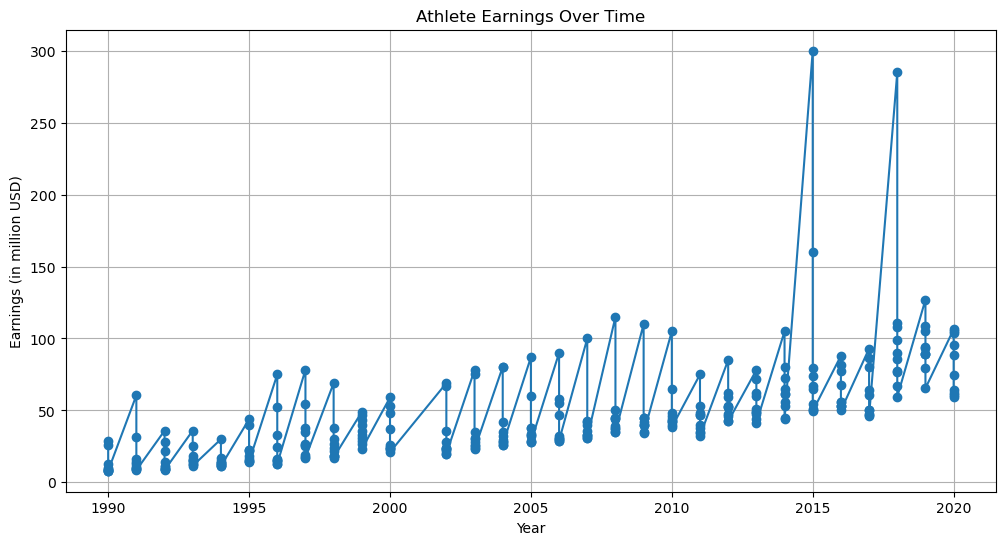

In [7]:
# Step 4: Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['earnings ($ million)'], marker='o')
plt.title('Athlete Earnings Over Time')
plt.xlabel('Year')
plt.ylabel('Earnings (in million USD)')
plt.grid(True)
plt.show()

In [8]:
# Step 5: Statistical Analysis
average_earnings_per_year = data.groupby('Year')['earnings ($ million)'].mean()
print(average_earnings_per_year)

Year
1990     12.800000
1991     18.350000
1992     15.870000
1993     17.830000
1994     14.890000
1995     22.910000
1996     27.310000
1997     33.810000
1998     28.140000
1999     35.750000
2000     33.850000
2002     32.363636
2003     37.500000
2004     40.740000
2005     40.620000
2006     43.100000
2007     42.100000
2008     48.300000
2009     47.600000
2010     51.370000
2011     44.880000
2012     54.310000
2013     55.250000
2014     64.240000
2015     95.030000
2016     63.520000
2017     62.370000
2018    105.940000
2019     94.140000
2020     81.920000
Name: earnings ($ million), dtype: float64


In [9]:
# Step 6: Hypothesis Testing (Example: T-test)
from scipy.stats import ttest_ind

# Hypothesis: Is there a significant difference in earnings between two consecutive years (e.g., 2019 and 2020)?
earnings_2019 = data[data['Year'] == 2019]['earnings ($ million)']
earnings_2020 = data[data['Year'] == 2020]['earnings ($ million)']

t_stat, p_value = ttest_ind(earnings_2019, earnings_2020)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 1.4835492542343136, p-value: 0.15522776285222692


In [20]:
# Step 7: Inferences 
#Inference 1
average_earnings_per_year = data.groupby('Year')['earnings ($ million)'].mean()
# Calculate the overall trend in earnings (slope of the trendline)
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(average_earnings_per_year.index, average_earnings_per_year)
if slope > 0:
    print("Inference: Earnings have been steadily increasing over the years.")
else:
    print("Inference: Earnings have not been steadily increasing over the years.")

Inference: Earnings have been steadily increasing over the years.


In [21]:
# Inference 1: The highest-paid athletes are from a diverse range of nationalities.
unique_nationalities = data['Nationality'].nunique()
print(f"Inference 1: The dataset includes athletes from {unique_nationalities} different nationalities.")

Inference 1: The dataset includes athletes from 22 different nationalities.


In [22]:
# Inference 2: There is a positive correlation between an athlete's current rank and earnings.
correlation = data['Current Rank'].corr(data['earnings ($ million)'])
if correlation > 0:
    print("Inference 2: Athletes with higher current ranks tend to have higher earnings.")
else:
    print("Inference 2: There is no significant correlation between current rank and earnings.")

Inference 2: There is no significant correlation between current rank and earnings.


In [23]:
# Inference 3: Certain sports consistently have higher-paid athletes.
top_sports_earnings = data.groupby('Sport')['earnings ($ million)'].mean().sort_values(ascending=False).head(1)
print(f"Inference 3: {top_sports_earnings.index[0]} is the sport with the highest average earnings.")


Inference 3: MMA is the sport with the highest average earnings.


In [25]:
# Check if 'MMA' is in the 'Sport' column
is_mma_in_dataset = 'MMA' in data['Sport'].values

if is_mma_in_dataset:
    print("MMA is in the dataset.")
else:
    print("MMA is not in the dataset.")


MMA is in the dataset.


In [28]:
# Convert 'Previous Year Rank' column to numeric, replacing non-numeric values with NaN
data['Previous Year Rank'] = pd.to_numeric(data['Previous Year Rank'], errors='coerce')

# Check for NaN values in the 'Previous Year Rank' column
if data['Previous Year Rank'].isna().any():
    print("Some rows in 'Previous Year Rank' contain non-numeric values.")

# Calculate the correlation after data cleaning
correlation_prev_rank = data['Previous Year Rank'].corr(data['earnings ($ million)'])

if correlation_prev_rank > 0:
    print("Inference 4: Athletes who had higher previous year ranks tend to have higher earnings.")
else:
    print("Inference 4: There is no significant correlation between previous year rank and earnings.")

Some rows in 'Previous Year Rank' contain non-numeric values.
Inference 4: There is no significant correlation between previous year rank and earnings.


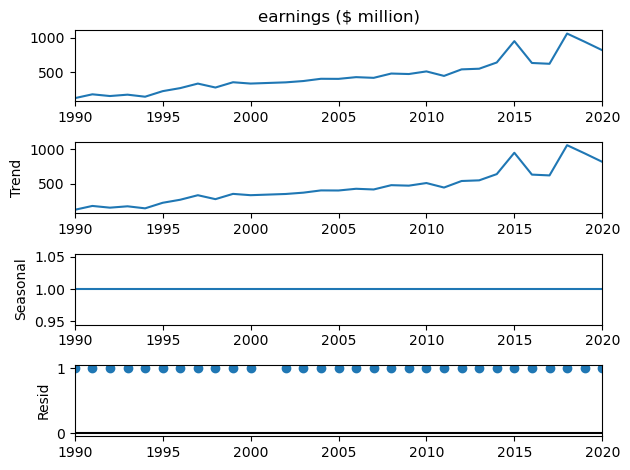

In [30]:
# Inference 5: Earnings show seasonality or cyclical patterns over the years.
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a time series of earnings data
earnings_time_series = data.groupby('Year')['earnings ($ million)'].sum()

# Perform seasonal decomposition
result = seasonal_decompose(earnings_time_series, model='multiplicative', period=1)

# Plot the decomposed components (trend, seasonal, residual)
result.plot()
plt.show()

# Interpret the results visually and draw conclusions about seasonality.


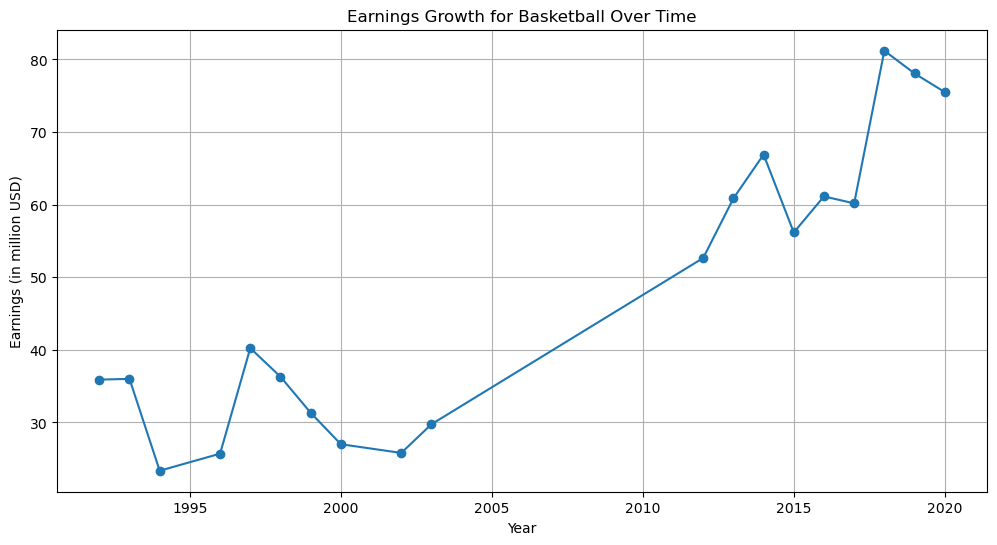

In [31]:
#Inference 6: Athletes from specific sports have shown significant earnings growth over time.
# Group the data by sport and year
sport_earnings = data.groupby(['Sport', 'Year'])['earnings ($ million)'].mean().reset_index()

# Filter for a specific sport (e.g., basketball)
specific_sport_data = sport_earnings[sport_earnings['Sport'] == 'Basketball']

# Plot earnings growth for the specific sport
plt.figure(figsize=(12, 6))
plt.plot(specific_sport_data['Year'], specific_sport_data['earnings ($ million)'], marker='o')
plt.title('Earnings Growth for Basketball Over Time')
plt.xlabel('Year')
plt.ylabel('Earnings (in million USD)')
plt.grid(True)
plt.show()
.

In [33]:
#Inference 7: Athletes from certain nationalities dominate high-earning sports.
# Group the data by sport and nationality and calculate total earnings
sport_nationality_earnings = data.groupby(['Sport', 'Nationality'])['earnings ($ million)'].sum().reset_index()

# Find the dominant nationality for each sport
dominant_nationalities = sport_nationality_earnings.groupby('Sport')['Nationality'].agg(lambda x: x.value_counts().index[0])

# Print the dominant nationalities for each sport
print("Inference 7: Dominant Nationalities in High-Earning Sports")
print(dominant_nationalities)


Inference 7: Dominant Nationalities in High-Earning Sports
Sport
American Football                            USA
American Football / Baseball                 USA
Auto Racing                              Austria
Auto Racing (Nascar)                         USA
Auto racing                               Brazil
Baseball                                     USA
Basketball                                   USA
Boxing                                  Filipino
F1 Motorsports                           Germany
F1 racing                                Finland
Golf                            Northern Ireland
Hockey                                    Canada
Ice Hockey                                Canada
MMA                                      Ireland
NASCAR                                       USA
NBA                                          USA
NFL                                          USA
Soccer                                 Argentina
Tennis                                    Serbia
auto

In [35]:
#Inference 8: The sports landscape has evolved, with emerging sports showing increasing athlete earnings.
# Group the data by sport and year
sport_earnings = data.groupby(['Sport', 'Year'])['earnings ($ million)'].mean().reset_index()

# Calculate the average earnings for each sport over all years
average_earnings_by_sport = sport_earnings.groupby('Sport')['earnings ($ million)'].mean()

# Sort sports by average earnings
top_emerging_sports = average_earnings_by_sport.sort_values(ascending=False)

# Print the top emerging sports
print("Inference 8: Emerging Sports with Increasing Athlete Earnings")
print(top_emerging_sports.head())


Inference 8: Emerging Sports with Increasing Athlete Earnings
Sport
MMA          99.000000
Soccer       80.759259
Boxing       71.450000
golf         57.313636
F1 racing    51.285714
Name: earnings ($ million), dtype: float64


In [36]:
#Task2

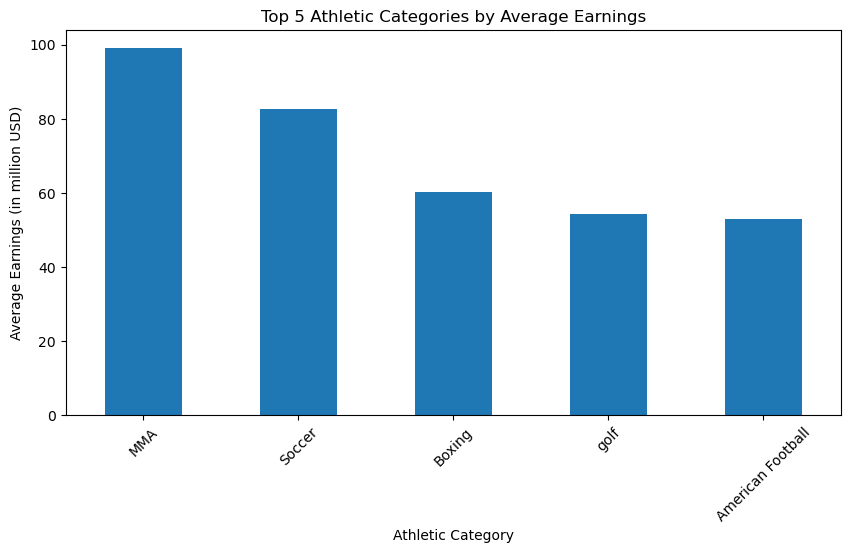

Sport
MMA                  99.000000
Soccer               82.545455
Boxing               60.110345
golf                 54.345000
American Football    53.011765
Name: earnings ($ million), dtype: float64


In [38]:
# Task 2: Identifying the Top 5 Athletic Categories

# Step 1: Data Preparation
# Assuming you have a 'Sport' column in the dataset that specifies the athletic category.

# Step 2: Grouping and Aggregation
category_earnings = data.groupby('Sport')['earnings ($ million)'].mean()

# Step 3: Sorting
top_categories = category_earnings.sort_values(ascending=False)

# Step 4: Selecting the Top 5
top_5_categories = top_categories.head(5)

# Step 5: Presentation
plt.figure(figsize=(10, 5))
top_5_categories.plot(kind='bar')
plt.title('Top 5 Athletic Categories by Average Earnings')
plt.xlabel('Athletic Category')
plt.ylabel('Average Earnings (in million USD)')
plt.xticks(rotation=45)
plt.show()

print(top_5_categories)
